In [2]:
import pandas as pd
import zipfile

# Unzip the dataset if it's zipped
zip_file_path = '/content/Tweets.csv.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

# Load dataset
df = pd.read_csv("/content/Tweets.csv")

# Keep only required columns
df = df[['text', 'airline_sentiment']]

# Rename for clarity
df.columns = ['tweet', 'sentiment']

df.head()

,tweet,sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [3]:
print(df.sentiment.value_counts())
print("\nMissing values:\n", df.isnull().sum())

sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

Missing values:
 tweet        0
sentiment    0
dtype: int64


In [4]:
import re
import nltk

nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)

    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]

    return " ".join(words)

df['clean_tweet'] = df['tweet'].apply(clean_text)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,tweet,sentiment,clean_tweet
0,@VirginAmerica What @dhepburn said.,neutral,said
1,@VirginAmerica plus you've added commercials t...,positive,plus youve added commercial experience tacky
2,@VirginAmerica I didn't today... Must mean I n...,neutral,didnt today must mean need take another trip
3,@VirginAmerica it's really aggressive to blast...,negative,really aggressive blast obnoxious entertainmen...
4,@VirginAmerica and it's a really big bad thing...,negative,really big bad thing


In [5]:
from sklearn.model_selection import train_test_split

X = df['clean_tweet']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7810792349726776

Classification Report:
               precision    recall  f1-score   support

    negative       0.81      0.94      0.87      1835
     neutral       0.65      0.51      0.57       620
    positive       0.80      0.54      0.64       473

    accuracy                           0.78      2928
   macro avg       0.75      0.66      0.69      2928
weighted avg       0.77      0.78      0.77      2928



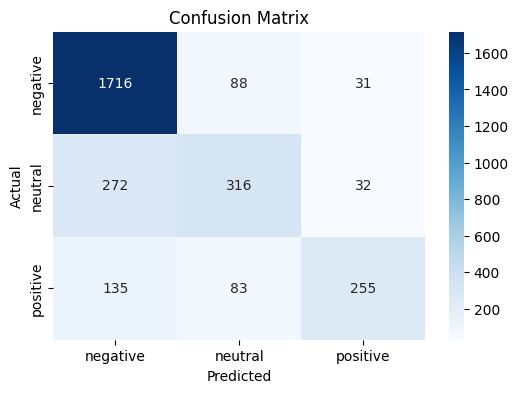

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [10]:
sample_tweet = ["The flight was delayed and staff were rude"]

sample_clean = [clean_text(sample_tweet[0])]
sample_vec = vectorizer.transform(sample_clean)

print("Predicted Sentiment:", model.predict(sample_vec)[0])

Predicted Sentiment: negative
